# Proyek Machine Learning Pemula
- Nama: Theofilus Arifin
- Email: theofilusarifin@gmail.com
- Id Dicoding: theofilusarifin

## Import Library

In [20]:
import requests
import zipfile
import io

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from google.colab import files
from matplotlib import pyplot as plt
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data Gathering

In [5]:
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()

In [6]:
# Load folder in a directory
directory_path = 'rockpaperscissors'
all_files = os.listdir(directory_path)

# Load Subfolders
subfolders = [f.path for f in os.scandir(directory_path) if f.is_dir()]

In [7]:
image_data = []
labels = []

# read files
for folder in subfolders:
    label = os.path.basename(folder)
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (150, 150))
                image_data.append(image)
                labels.append(label)

In [8]:
# Convert image data to numpy array
image_data_arr = np.array(image_data)

In [9]:
# Create a label encoder
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)
one_hot_encoder = OneHotEncoder(sparse=False)
integer_labels = integer_labels.reshape(-1, 1)
labels = one_hot_encoder.fit_transform(integer_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
print("Total Image Data:", len(image_data_arr), "Sample")
print("Image Data Shape:", image_data_arr.shape)

Total Image Data: 2188 Sample
Image Data Shape: (2188, 150, 150, 3)


## Preprocessing

In [11]:
# Dataset Split (40% for Validation Set)
X_train, X_test, y_train, y_test = train_test_split(image_data_arr, labels, test_size=0.4, random_state=1)

print("Training Data:", len(X_train), "Sample")
print("Test Data:", len(X_test), "Sample")

Training Data: 1312 Sample
Test Data: 876 Sample


In [12]:
# Train Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

train_generator = train_datagen.flow(X_train,  y_train, batch_size=32)

In [13]:
# Validation Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)

## Modeling

In [14]:
# Create Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [15]:
# compile model with adam optimizer and categorical crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
# train model
model_history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2,
)

Epoch 1/10
20/20 - 50s - loss: 1.2099 - accuracy: 0.3844 - val_loss: 1.0593 - val_accuracy: 0.3719 - 50s/epoch - 2s/step
Epoch 2/10
20/20 - 42s - loss: 0.9163 - accuracy: 0.5750 - val_loss: 0.7901 - val_accuracy: 0.6656 - 42s/epoch - 2s/step
Epoch 3/10
20/20 - 42s - loss: 0.8200 - accuracy: 0.6562 - val_loss: 0.7644 - val_accuracy: 0.7031 - 42s/epoch - 2s/step
Epoch 4/10
20/20 - 42s - loss: 0.6735 - accuracy: 0.7344 - val_loss: 0.5813 - val_accuracy: 0.7906 - 42s/epoch - 2s/step
Epoch 5/10
20/20 - 42s - loss: 0.4980 - accuracy: 0.8266 - val_loss: 0.4333 - val_accuracy: 0.8219 - 42s/epoch - 2s/step
Epoch 6/10
20/20 - 43s - loss: 0.4029 - accuracy: 0.8594 - val_loss: 0.3406 - val_accuracy: 0.8938 - 43s/epoch - 2s/step
Epoch 7/10
20/20 - 42s - loss: 0.2617 - accuracy: 0.9016 - val_loss: 0.2320 - val_accuracy: 0.9187 - 42s/epoch - 2s/step
Epoch 8/10
20/20 - 42s - loss: 0.2894 - accuracy: 0.8969 - val_loss: 0.2295 - val_accuracy: 0.9094 - 42s/epoch - 2s/step
Epoch 9/10
20/20 - 43s - loss: 0

## Evaluation

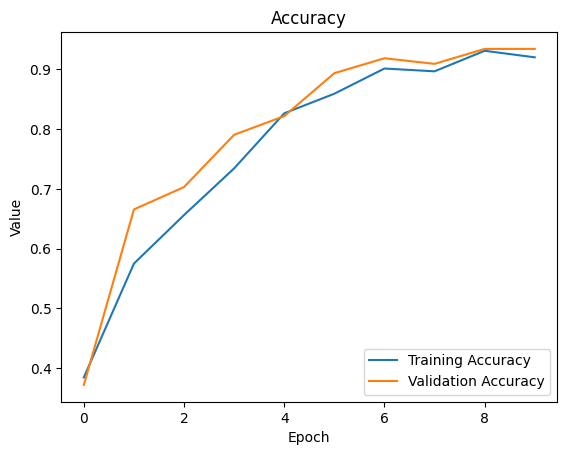

In [17]:
# accuracy train & validation
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

## Prediction Testing

Saving ta6G9KRgDwtvZsrJ.png to ta6G9KRgDwtvZsrJ.png
1/1 [==============================] - 0s 149ms/step
ta6G9KRgDwtvZsrJ.png
scissors


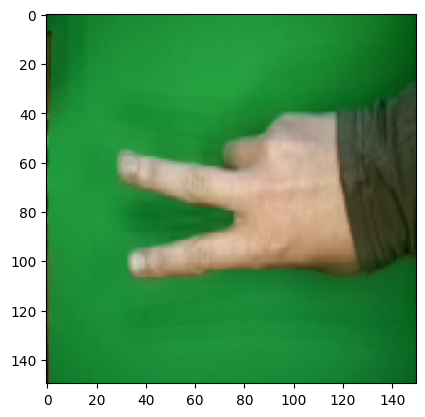

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0, 0] != 0:
    print('paper')
  elif classes[0, 1] != 0:
    print('rock')
  else:
    print('scissors')